In [173]:
#  Kinetic Monte Carlo Calculation of Chemical Vapor Deposition
#
#  Based on C. Battaille and D. J. Srolovitz, Annual Reviews of Materials
#  Research, 32,  2002.
#
#  input:
#       nsites = number of surface sites in model
#       timesteps = number of kinetic Monte Carlo Steps (MCS)
#       cmax = maximum height expected in simulation (used to set dimensions)
#       imageflag = whether to save images for video making: 1 = yes, 0 = no.
#       reaction rates  (ste after function input)
#
#  output:
#       tot = array with species at most recent timestep
#       tottime = 3D array giving time step arrays (3D) of the simulation.
#       height = array of heights at each site
#       species = chemical composition at surface at each site
#       time = KMC time
#       tota = Overall surface activity over time
#       aveh = average height at each timestep

import matplotlib.pyplot as plt
from colorspacious import cspace_converter

import matplotlib as mpl

import numpy as np

import random as rm

def KMC_358(nsites = None,timesteps = None,cmax = None,imageflag = None): 
    
    #"Insert Description"
    #
    #
    #
    #
    
    
    #Set the rates of the reaction coefficients.
    
    r1 = 0;
    
    rm1 = 500;
    
    r2 = 500;
    
    rm2 = 0;
    
    r3 = 500;

    
    # "ar" defines an array of the specific activities for each species: [A(s), B(s), AB2(s), *(s)]

    ar = np.array([0,rm1,rm2 + r3,r1 + r2])


    #  set up the matrices needed
    
    tot = np.zeros((nsites,cmax))

    height = np.zeros((nsites,1))

    species = np.zeros((nsites,1))

    act = np.zeros((nsites,1))

    aveh = np.zeros((timesteps + 1,1))

    tota = np.zeros((timesteps + 1,1))

    time = np.zeros((timesteps + 1,1))


    #Set colormapping for visualization

    c = np.zeros((5,3))

    c[0,:] = np.array([1,1,1])

    c[1,:] = np.array([0,0,0])

    c[2,:] = np.array([0.25,0.25,0.25])

    c[3,:] = np.array([0.5,0.5,0.5])

    c[4,:] = np.array([0.75,0.75,0.75])
    
   # Colormap(c)

    clims = np.array([0,4])


    # create initial state in which one layer of type A is covered by a layer of B

    for i in np.arange(0,nsites):
        
        tot[i,0] = 1
        
        tot[i,1] = 2
        
        height[i] = 2
        
        species[i] = 2
        
    
    tottime = []
        
    tottime.append(tot)

    aveh[0] = 2

    time[0] = 0

    tm = 0


    #loop over the time steps

    for timestep in np.arange(1,timesteps+1):
        
        # Determine the activity at each site
        
        for i in np.arange(1,nsites+1):
            
            # Determine the total activity of the system
            
            k = height[i-1]
            
            s = species[i-1]            
            
            act[i-1] = ar[int(s[0])-1]
            
        # find the activity per site divided by the total activity (the fraction)
    
        # ss = cumulative sum of fractional activities
    
        at = sum(act)
               
        acta = act / at
        
        ss = np.cumsum(acta)
        
        tota[0] = at
        
        # pick the site at which a reaction will occur based on random number and
        
        # activity number line
        
        k = 1
        
        rand1 = rm.randint(0,1)
        
        for j in np.arange(1,nsites):
            
            if rand1 > ss[j-1]:
                
                k = k + 1
        
        # find the species and height of the selected site.
        
        t = species[k-1]
        
        h = height[k-1]
        
        #use random numbers to select reaction, reset species and height
        
        if t == 2:
            
            tot[k-1][int(h[0])] = 4
            
            species[k-1] = 4
        
        else:
            
            if t == 3:
                
                if rm.randint(0,1) < r3 / (r3 + rm2):
                    
                    tot[k-1][int(h[0])] = 1
                    
                    tot[k-1][int(h[0])] = 2
                    
                    species[k-1] = 2
                    
                    height[k-1] = h + 1
                
                else:
                    
                    tot[k-1][int(h[0])] = 4
                    
                    species[k-1] = 4
            
            else:
                
                if t == 4:
                    
                    if rm.randint(0,1) < r1 / (r1 + r2):
                        
                        tot[k-1][int(h[0])] = 2
                        
                        species[k-1] = 2
                    
                    else:
                        
                        tot[k-1][int(h[0])] = 3
                        
                        species[k-1] = 3

        #  find change in time and total time
        
        rand1 = rm.randint(0,1)
        
        
        dt = - np.log(rand1 + 0.01) / (at + 0.01)
        
        tm = tm + dt
            
        time[timestep] = tm
        
        sh = sum(height)
        
        aveh[timestep] = sh / nsites
        
        tota[timestep] = sum(act)
        
        cat = []
        tottime.append(np.ndarray.tolist(tot))
        #tottime = cat.append(tot)
        
        
        #Visualization output-----------------------------
        
      #  if imageflag == 1:
            
      #      imagesc(rot90(tottime(:,:,timestep)),clims)
            
      #      colorbar('YTick',np.array([0.4,1.2,2.0,2.8,3.6]),'YTickLabel',np.array(['Open','A(b)','B(s)','AB2','*']))
            
      #      plt.axis('off')
            
      #      str_saveas = 'TimeStepImage_%d.png'
            
      #      str_saveas = sprintf(str_saveas,timestep)
            
      #      saveas(gcf,str_saveas)

    return tot,tottime,height,species,time,aveh,tota

"\nplt.figure(1)\n\nplt.plot(time,tota,'red')\n\nplt.xlabel('Time')\n\nplt.ylabel('Overall Surface Activity')\n\n\n\nplt.figure(2)\n\nplt.plot(time,aveh,'red')\n\nplt.xlabel('Time')\n\nplt.ylabel('Average Height')\n"

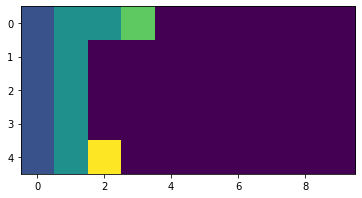

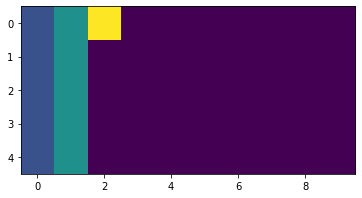

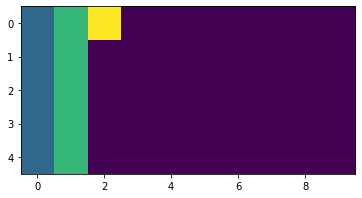

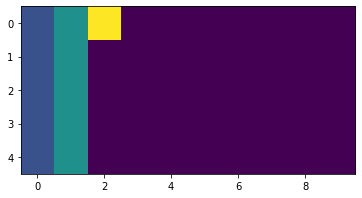

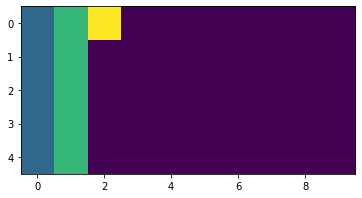

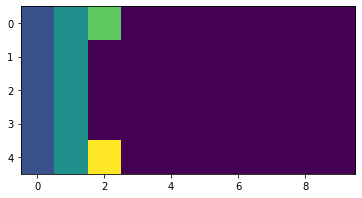

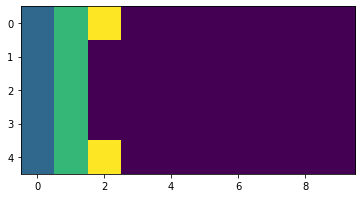

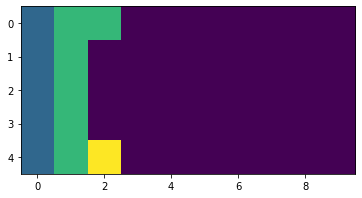

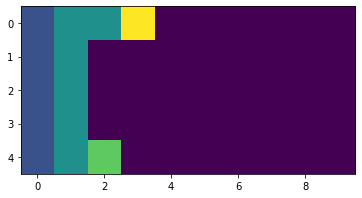

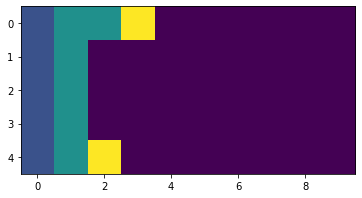

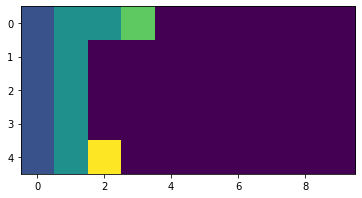

In [174]:
data = KMC_358(5,10,10,1)
tot = data[1]


for i in range(len(tot)):
    plt.figure(i)
    plt.imshow(tot[i],interpolation = 'none')

"""
plt.figure(1)

plt.plot(time,tota,'red')

plt.xlabel('Time')

plt.ylabel('Overall Surface Activity')



plt.figure(2)

plt.plot(time,aveh,'red')

plt.xlabel('Time')

plt.ylabel('Average Height')
"""

In [175]:
print(tot)

[array([[1., 2., 2., 3., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 4., 0., 0., 0., 0., 0., 0., 0.]]), [[1.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], [[1.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0

In [168]:
a1 = [0,0]
a2 = [1,1]
a3 = [2,2]

A = []
A.append(a1)
A.append(a2)
A.append(a3)
print(A)

[[0, 0], [1, 1], [2, 2]]


In [10]:
c[1,:] = np.array([1,1,1])

In [11]:
c

array([[0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [135]:
nsites = 5
cmax = 10
timesteps = 10

tot = np.zeros((nsites,cmax))

height = np.zeros((nsites,1))

species = np.zeros((nsites,1))

act = np.zeros((nsites,1))

aveh = np.zeros((timesteps + 1,1))

tota = np.zeros((timesteps + 1,1))

time = np.zeros((timesteps + 1,1))

    # create initial state in which one layer of type A is covered by a layer of B

for i in np.arange(0,nsites):
        
    tot[i,0] = 1
        
    tot[i,1] = 2
        
    height[i] = 2
        
    species[i] = 2
        
    
tottime = []
        
tottime.append(tot)

aveh[0] = 2

time[0] = 0

tm = 0

print(tottime)

[array([[1., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0.]])]


In [145]:
r1 = 0;
    
rm1 = 500;
    
r2 = 500;
    
rm2 = 0;
    
r3 = 500;
    
ar = np.array([0,rm1,rm2 + r3,r1 + r2])

for timestep in np.arange(0,timesteps):
        
        # Determine the activity at each site
        
    for i in np.arange(0,nsites):
            
            # Determine the total activity of the system
            
        k = height[i]
            
        s = species[i]            
        
        act[i] = ar[int(s[0])-1] #FLAG
            
        # find the activity per site divided by the total activity (the fraction)
    
        # ss = cumulative sum of fractional activities
    
    at = sum(act)
               
    acta = act / at
        
    ss = np.cumsum(acta)
        
    tota[0] = at
        
        # pick the site at which a reaction will occur based on random number and
        
        # activity number line
        
    k = 0
        
    rand1 = rm.randint(0,1)
        
    for j in np.arange(0,nsites-1):
            
        if rand1 > ss[j]:
        
            k = k + 1
        
        # find the species and height of the selected site.
        
    t = species[k-1]
        
    h = height[k-1]
        
        #use random numbers to select reaction, reset species and height
        
    if t == 2:
            
        tot[k-1][int(h[0])] = 4
            
        species[k-1] = 4
        
    else:
            
        if t == 3:
                
            if rm.randint(0,1) < r3 / (r3 + rm2):
                    
                tot[k][int(h[0])] = 1
                    
                tot[k][int(h[0])+1] = 2
                    
                species[k] = 2
                    
                height[k] = h + 1
                
            else:
                    
                tot[k][int(h[0])] = 4
                    
                species[k] = 4
            
        else:
                
            if t == 4:
                    
                if rm.randint(0,1) < r1 / (r1 + r2):
                        
                    tot[k][int(h[0])] = 2
                        
                    species[k] = 2
                    
                else:
                        
                    tot[k][int(h[0])] = 3
                        
                    species[k] = 3

In [ ]:
data = KMC_358(5,10,10,1)
tot = data[1]

In [176]:
def KMC_358_2(nsites = None,timesteps = None,cmax = None,imageflag = None): 
    
    r1 = 0;
    
    rm1 = 500;
    
    r2 = 500;
    
    rm2 = 0;
    
    r3 = 500;

    
    # "ar" defines an array of the specific activities for each species: [A(s), B(s), AB2(s), *(s)]

    ar = np.array([0,rm1,rm2 + r3,r1 + r2])


    #  set up the matrices needed
    
    tot = np.zeros((nsites,cmax))

    height = np.zeros((nsites,1))

    species = np.zeros((nsites,1))

    act = np.zeros((nsites,1))

    aveh = np.zeros((timesteps + 1,1))

    tota = np.zeros((timesteps + 1,1))

    time = np.zeros((timesteps + 1,1))


    # create initial state in which one layer of type A is covered by a layer of B

    for i in np.arange(0,nsites):
        
        tot[i,0] = 1
        
        tot[i,1] = 2
        
        height[i] = 2
        
        species[i] = 2
        
    
    tottime = []
    
    print(tot)
    tottime.append(np.ndarray.tolist(tot))

    aveh[0] = 2

    time[0] = 0

    tm = 0


    #loop over the time steps

    for timestep in np.arange(0,timesteps):
        
        # Determine the activity at each site
        
        for i in np.arange(0,nsites):

                # Determine the total activity of the system

            k = height[i]

            s = species[i]            

            act[i] = ar[int(s[0])-1] #FLAG

            # find the activity per site divided by the total activity (the fraction)

            # ss = cumulative sum of fractional activities

        at = sum(act)

        acta = act / at

        ss = np.cumsum(acta)

        tota[0] = at

            # pick the site at which a reaction will occur based on random number and

            # activity number line

        k = 0

        rand1 = rm.randint(0,1)

        for j in np.arange(0,nsites-1):

            if rand1 > ss[j]:

                k = k + 1

            # find the species and height of the selected site.

        t = species[k-1]

        h = height[k-1]

            #use random numbers to select reaction, reset species and height

        if t == 2:

            tot[k-1][int(h[0])] = 4

            species[k-1] = 4

        else:

            if t == 3:

                if rm.randint(0,1) < r3 / (r3 + rm2):

                    tot[k][int(h[0])] = 1

                    tot[k][int(h[0])+1] = 2

                    species[k] = 2

                    height[k] = h + 1

                else:

                    tot[k][int(h[0])] = 4

                    species[k] = 4

            else:

                if t == 4:

                    if rm.randint(0,1) < r1 / (r1 + r2):

                        tot[k][int(h[0])] = 2

                        species[k] = 2

                    else:

                        tot[k][int(h[0])] = 3

                        species[k] = 3

            #  find change in time and total time

            rand1 = rm.randint(0,1)


            dt = - np.log(rand1 + 0.01) / (at + 0.01)

            tm = tm + dt

            time[timestep] = tm

            sh = sum(height)

            aveh[timestep] = sh / nsites

            tota[timestep] = sum(act)

            cat = []
            tottime.append(np.ndarray.tolist(tot))
            #tottime = cat.append(tot)

    return tot,tottime,height,species,time,aveh,tota

[[1. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0. 0. 0. 0.]]


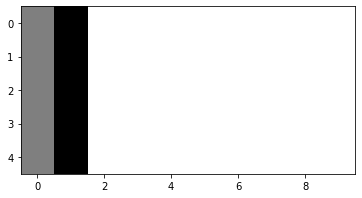

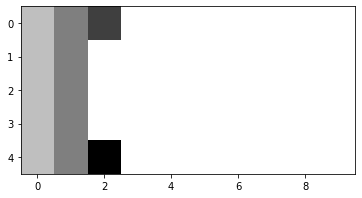

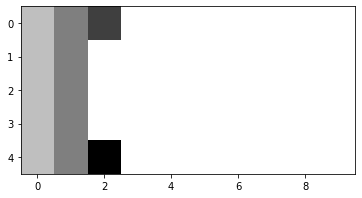

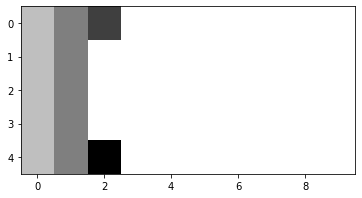

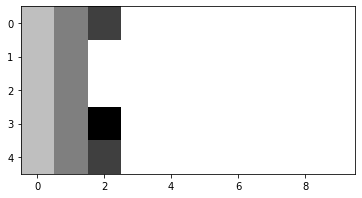

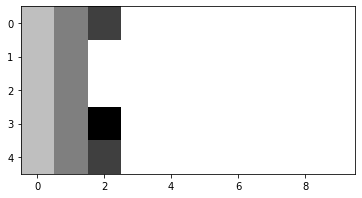

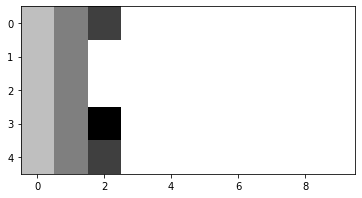

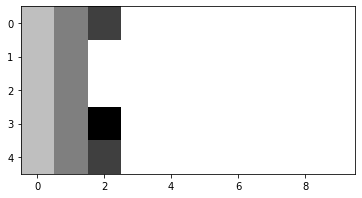

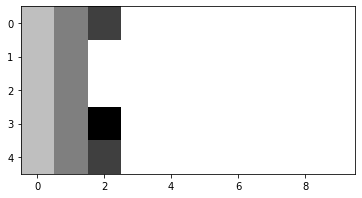

In [201]:
data = KMC_358_2(5,10,10,1)
tot = data[1]

for i in range(len(tot)):
    plt.figure(i)
    plt.imshow(tot[i],interpolation = 'none', cmap = 'gray_r')

In [193]:
print(cmap)

{'0': [0, 0, 0], 1: [51, 51, 51], 2: [64, 64, 64], 3: [85, 85, 85], 4: [128, 128, 128], 5: [256, 256, 256]}


In [194]:
print(tot[1])

[[1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0, 2.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
